In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


from sklearn.cluster import KMeans

In [9]:
'''
CUST_ID: Identification of Credit Cardholder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from the account.

ONEOFF_PURCHASES: Maximum purchase amount done in one go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user
'''

'\nCUST_ID: Identification of Credit Cardholder (Categorical)\n\nBALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) \n\nPURCHASES: Amount of purchases made from the account.\n\nONEOFF_PURCHASES: Maximum purchase amount done in one go\n\n INSTALLMENTS_PURCHASES: Amount of purchase done in installment\n\n CASH_ADVANCE: Cash in advance given by the user\n\nPURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)\n\n ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)\n\n PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)\n\nCASHADVANCEFREQUENCY: How frequently the cash in advance is being paid \n

In [5]:
df = pd.read_csv("cc.csv")
print(list(df.columns))

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df = df.drop("CUST_ID", axis=1)
df["CREDIT_LIMIT"].fillna(df['CREDIT_LIMIT'].mode()[0], inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df['MINIMUM_PAYMENTS'].mode()[0], inplace=True)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.452407,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.897280,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,299.351881,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
model=AgglomerativeClustering( affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)

In [9]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.head()

,0
0,0
1,0
2,0
3,0
4,0


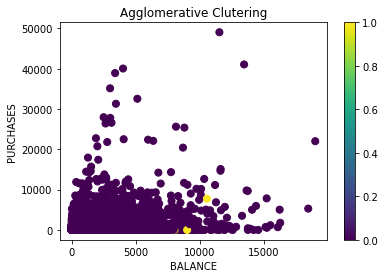

In [10]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (x=df['BALANCE'] , y=df["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

In [11]:
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,0
3,0
4,4
...,...
8945,4
8946,4
8947,4
8948,4


In [12]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[1.65494809e+03 9.05569473e-01 1.51304429e+03 9.45739817e+02
  5.67698718e+02 8.13031011e+02 5.87831726e-01 3.37622530e-01
  4.07327694e-01 1.14705882e-01 2.66707367e+00 2.15144485e+01
  6.98212713e+03 2.02836865e+03 6.37406959e+02 1.97623568e-01
  1.17659748e+01]
 [4.82080345e+03 9.09931025e-01 1.14382085e+04 8.18784780e+03
  3.25054712e+03 4.99019925e+03 7.68862339e-01 6.29431746e-01
  6.15417508e-01 2.06498992e-01 8.49152542e+00 8.87966102e+01
  1.26572034e+04 1.86548118e+04 2.38119185e+03 3.43899305e-01
  1.18220339e+01]
 [5.61543836e+03 9.61052508e-01 1.38353825e+03 8.42839290e+02
  5.40778189e+02 4.03736821e+03 4.52429864e-01 2.47745180e-01
  3.34396512e-01 3.42575327e-01 1.01538462e+01 1.96213018e+01
  1.08707746e+04 4.01243432e+03 1.95883403e+03 6.38992899e-02
  1.16591716e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03

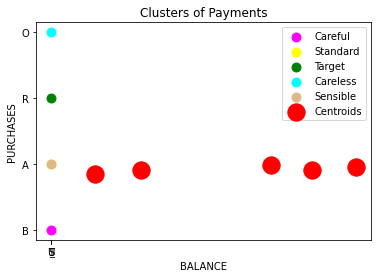

In [15]:
data = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.scatter(data[0][1],          
            data[1][0],s=80,c='magenta',label='Careful')
plt.scatter(data[0][1],
           data[2][1],s=80,c='yellow',label='Standard')
plt.scatter(data[0][2],
           data[3][2],s=80,c='green',label='Target')
plt.scatter(data[0][3], 
           data[4][3],s=80,c='cyan',label='Careless')
plt.scatter(data[0][4], 
           data[5][4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Payments')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()
